In [1]:
import pandas as pd
from pathlib import Path
#from hict.api.ContactMatrixFacet import ContactMatrixFacet
#from hict.util.matrix_visualise import MatrixVisualise
import cooler
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras.models import load_model
import glob
import matplotlib.colors as clr
#from utils_scripts.models_methods import produce_model, predict_by_single_model
#from HICT_Patterns.utils_scripts.produce_samples import make_samples
import pathlib
import shutil

In [3]:
local_path = 'D:/Study/HICT/HICT_Patterns/'
clr_map = clr.LinearSegmentedColormap.from_list('yarg', ['#fff','#000'], N=256)
clr_map_center = clr.LinearSegmentedColormap.from_list('yarg', ['#000','#fff'], N=256)
resolution = 10000
device_name = '/device:GPU:0'

train_dir_centered = pathlib.Path(f'{local_path}datasets/images_center_10')
train_dir_uncentered = pathlib.Path(f'{local_path}datasets/images_10')
test_dir_centered = pathlib.Path(f'{local_path}datasets/temp_images_centered_{resolution//1000}')
test_dir_uncentered = pathlib.Path(f'{local_path}datasets/temp_images_uncentered_{resolution//1000}')

In [3]:
if os.path.exists(train_dir_centered):
    shutil.rmtree(train_dir_centered)
    os.mkdir(train_dir_centered)
else:
    os.mkdir(train_dir_centered)
os.mkdir(pathlib.Path(f'{train_dir_centered}/positive'))
os.mkdir(pathlib.Path(f'{train_dir_centered}/negative'))

if os.path.exists(train_dir_uncentered):
    shutil.rmtree(train_dir_uncentered)
    os.mkdir(train_dir_uncentered)
else:
    os.mkdir(train_dir_uncentered)
os.mkdir(pathlib.Path(f'{train_dir_uncentered}/positive'))
os.mkdir(pathlib.Path(f'{train_dir_uncentered}/negative'))

if os.path.exists(test_dir_uncentered):
    shutil.rmtree(test_dir_uncentered)
    os.mkdir(test_dir_uncentered)
else:
    os.mkdir(test_dir_uncentered)
os.mkdir(pathlib.Path(f'{test_dir_uncentered}/unknown'))

In [4]:
make_samples(train_dir_centered, clr_map_center, resolution, True)
make_samples(train_dir_uncentered, clr_map, resolution, False)

_short_
_short_2_
_long_
2_short_
2_short_2_
2_long_
_short_
_short_2_
_medium_
_long_
2_short_
2_short_2_
2_medium_
2_long_
_short_
_short_2_
_long_
2_short_
2_short_2_
2_long_
_short_
_short_2_
_medium_
_long_
2_short_
2_short_2_
2_medium_
2_long_


In [5]:
models_centered = produce_model(train_dir_centered, device_name, single_model=True)
models_uncentered = produce_model(train_dir_uncentered, device_name, single_model=True)

Found 6662 files belonging to 2 classes.
Using 5330 files for training.
Found 6662 files belonging to 2 classes.
Using 1332 files for validation.
Epoch 1/30


C:\Users\vit\.conda\envs\HICT\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


167/167 [==============================] - 3s 10ms/step - loss: 0.1497 - accuracy: 0.9351 - val_loss: 0.0570 - val_accuracy: 0.9797
Epoch 2/30
167/167 [==============================] - 1s 9ms/step - loss: 0.0545 - accuracy: 0.9827 - val_loss: 0.0528 - val_accuracy: 0.9812
Epoch 3/30
167/167 [==============================] - 1s 9ms/step - loss: 0.0442 - accuracy: 0.9876 - val_loss: 0.0405 - val_accuracy: 0.9865
Epoch 4/30
167/167 [==============================] - 1s 9ms/step - loss: 0.0357 - accuracy: 0.9908 - val_loss: 0.0388 - val_accuracy: 0.9865
Epoch 5/30
167/167 [==============================] - 2s 9ms/step - loss: 0.0336 - accuracy: 0.9901 - val_loss: 0.0284 - val_accuracy: 0.9902
Epoch 6/30
167/167 [==============================] - 2s 9ms/step - loss: 0.0292 - accuracy: 0.9921 - val_loss: 0.0252 - val_accuracy: 0.9917
Epoch 7/30
167/167 [==============================] - 2s 10ms/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0345 - val_accuracy: 0.9925
Epoch 8/30
167/

In [6]:
'''
chr = 'scf5'
chunkFile = ContactMatrixFacet.get_file_descriptor(f'{local_path}data/arab_dongX_vs_mopti_2nd_try.hdf5')
ContactMatrixFacet.open_file(chunkFile)
ContactMatrixFacet.load_assembly_from_agp(chunkFile, Path(f'{local_path}data/mopti_female_assembly_2.agp'))
matrix = MatrixVisualise.get_matrix(chunkFile, 'scaffold_5', resolution, False)
'''
c = cooler.Cooler(f'{local_path}data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/{resolution}')
matrix = c.matrix(balance=False).fetch('2R')

src_matrix = np.log10(matrix+1)
max_value = np.nanmax(src_matrix)
min_value = np.nanmin(src_matrix)

if os.path.exists(test_dir_centered):
    shutil.rmtree(test_dir_centered)
    os.mkdir(test_dir_centered)
else:
    os.mkdir(test_dir_centered)
os.mkdir(pathlib.Path(f'{test_dir_centered}/unknown'))

for i in range(10, src_matrix.shape[0]-10):
        point = (i, i)
        point_area = src_matrix[point[1]-10:point[1]+10, point[0]-10:point[0]+10]
        plt.imsave(f'{test_dir_centered}/unknown/all_{i*resolution}_{i*resolution}.png',  point_area, cmap=clr_map_center, vmax=max_value, vmin=min_value)


center_detections = predict_by_single_model(pathlib.Path(f'{test_dir_centered}/unknown'), model=models_centered)

In [13]:
import numpy.ma as ma

c = cooler.Cooler(f'{local_path}data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/{resolution}')
matrix = c.matrix(balance=False).fetch('2R')
matrix[np.isnan(matrix)] = np.nanmean(matrix)
matrix[matrix == 0.0] = np.nanmean(matrix)
src_matrix = np.log10(matrix)
max_value = np.nanmax(src_matrix)
min_value = np.nanmin(src_matrix)


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(src_matrix, cmap=clr_map_center)
fig.colorbar(im)

#plt.scatter([i[0]//resolution for i in center_detections],[i[1]//resolution for i in center_detections],s=0.1, c='#E9967A')
plt.savefig(f'{local_path}results_images/output.png', dpi=1000)

FloatingPointError: divide by zero encountered in log10

In [12]:
np.nanmean(matrix)

0.35320497237331583

In [8]:
#remove heterochromatin area, coordinates acquired from plot
#also leave only one coordinate of point, because in pairs they are same
center_detections = sorted(center_detections)
center_detections_flat = [i[0] for i in center_detections if i[0]]

In [9]:
if os.path.exists(test_dir_uncentered):
    shutil.rmtree(test_dir_uncentered)
    os.mkdir(test_dir_uncentered)
else:
    os.mkdir(test_dir_uncentered)
os.mkdir(pathlib.Path(f'{test_dir_uncentered}/unknown'))

for x in center_detections_flat:
    for y in center_detections_flat:
        if x <= y:
            continue
        point = (x//resolution, y//resolution)
        point_area = src_matrix[point[1]-10:point[1]+10, point[0]-10:point[0]+10]
        plt.imsave(f'{test_dir_uncentered}/unknown/all_{x}_{y}.png',  point_area, cmap=clr_map, vmax=max_value, vmin=min_value)


final_detections = predict_by_single_model(pathlib.Path(f'{test_dir_uncentered}/unknown'), models_uncentered)

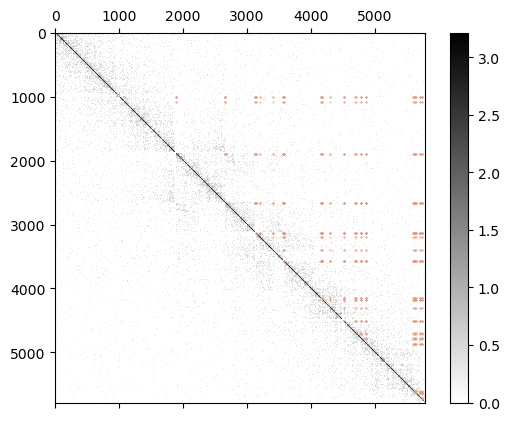

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(src_matrix, cmap=clr_map)
fig.colorbar(im)

plt.scatter([i[0]//resolution for i in final_detections],[i[1]//resolution for i in final_detections],s=0.1, c='#E9967A')
plt.savefig(f'{local_path}results_images/arab_dongX_vs_mopti_10k_conc.png', dpi=1000)

Создание образцов для новых типов перестроек

In [4]:
local_path = 'D:/Study/HICT/HICT_Patterns/'
centered = False
resolution = 10000


for chr in ("X", 'Chr2', 'Chr3'):
            c = cooler.Cooler(f'{local_path}data/arab/ARAB_var1_4DN.mcool::/resolutions/{resolution}')
            mat_balanced = c.matrix(balance=False).fetch(chr)
            mat_balanced += 1

            matrix = np.log10(mat_balanced)
            trans = pd.read_csv(f'{local_path}data/arab/variations_100.csv')
            trans = trans[trans.chr == chr]
            trans['start_res'] = trans.start // resolution
            trans['end_res'] = trans.end // resolution
            
            max_value = np.max(matrix)
            min_value = np.min(matrix)
            for label in ('copy_gain','copy_loss', 'inversion', 'copy_gain_reverse'):
                cur_trans = trans[trans.label == label]
                for i, row in cur_trans.iterrows():
                    if not centered:
                            point_uncentered = (row.end_res, row.start_res)
                            point_area_uncentered = matrix[point_uncentered[1] - 10:point_uncentered[1] + 10,
                                                    point_uncentered[0] - 10:point_uncentered[0] + 10]
                            try:
                                plt.imsave(f'{local_path}/datasets/arab_var/{label}/{chr[-1]}_{row.start}_{row.end}.png',
                                            point_area_uncentered, cmap=clr_map, vmax=max(np.nanmax(matrix), 0.5), vmin=0)
                            except SystemError:
                                  continue
                    else:
                        point_start = (row.start_res, row.start_res)
                        point_end = (row.end_res, row.end_res)
                        point_area_start = matrix[point_start[1] - 10:point_start[1] + 10,
                                           point_start[0] - 10:point_start[0] + 10]
                        point_area_end = matrix[point_end[1] - 10:point_end[1] + 10,
                                         point_end[0] - 10:point_end[0] + 10]
                        plt.imsave(f'{local_path}/datasets/arab_var/{label}/{chr[-1]}_{row.start}_{row.start}.png',
                                   point_area_start, cmap='Greys', vmax=max_value, vmin=min_value)
                        plt.imsave(f'{local_path}/datasets/arab_var/{label}/{chr[-1]}_{row.end}_{row.end}.png',
                                   point_area_end, cmap='Greys', vmax=max_value, vmin=min_value)

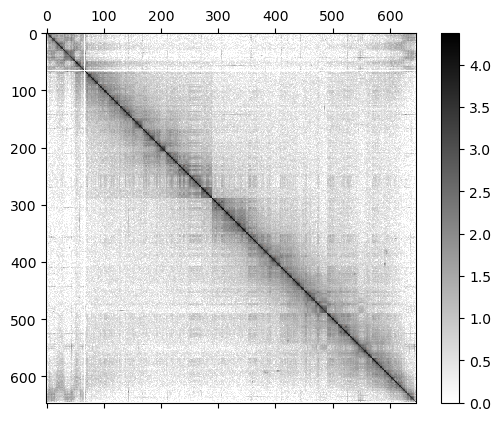

In [4]:
chr = 'Chr3'
resolution = 100000
c = cooler.Cooler(f'{local_path}data/arab/ARAB_del_4DN.mcool::/resolutions/{resolution}')
matrix = c.matrix(balance=False).fetch(chr)


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix+1), cmap=clr_map)
fig.colorbar(im)

trans = pd.read_csv(f'{local_path}data/arab/deletions_1M.csv')
trans = trans[trans.label != 'inversion']
trans = trans[trans.chr == chr]
trans['start_res'] = trans.start // resolution
trans['end_res'] = trans.end // resolution

plt.scatter(trans['end_res'],trans['start_res'],s=0.01, c='#E9967A')
plt.savefig('output.png', dpi = 1000)